<a href="https://colab.research.google.com/github/aiAdrian/flatland_railway_extension/blob/master/Flatland_recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚂 The Flatland Extension Demostrator and Recife Exporter

Flatland Extension code base:
https://github.com/aiAdrian/flatland_railway_extension/tree/master/flatland_extensions

The purpose of this notebook is to generate flatland scenarios and export them to recife. The data format documentation can be found at:

http://recife.univ-eiffel.fr/sharedData/data_format_documentation/

In [21]:
from IPython.display import clear_output
clear_output()

In [22]:
!pip install flatland-rl &> /dev/null

In [23]:
!git clone https://github.com/aiAdrian/flatland_railway_extension.git/
%cd flatland_railway_extension
!git pull
%cd ..

fatal: destination path 'flatland_railway_extension' already exists and is not an empty directory.
/content/flatland_railway_extension
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), 1.01 MiB | 5.42 MiB/s, done.
From https://github.com/aiAdrian/flatland_railway_extension
   9cad4ce..fedc90b  master     -> origin/master
Updating 9cad4ce..fedc90b
Fast-forward
 Flatland_Dynamics.ipynb            | 109 +++++++++++++++------------------------------------------
 Flatland_Resource_Allocation.ipynb |  88 +++++++---------------------------------------
 2 files changed, 40 insertions(+), 157 deletions(-)
/content


In [24]:
import os
import sys
os.environ['PYTHONPATH'] = "/env/python:/content/flatland-rl:/content/flatland_railway_extension"
if "/content/flatland-rl" not in sys.path:
  sys.path.insert(1, "/content/flatland-rl")
if "/content/flatland_railway_extension" not in sys.path:
  sys.path.insert(1, "/content/flatland_railway_extension")

In [25]:
# import all flatland dependance
import PIL
from flatland.utils.rendertools import RenderTool

# import all flatland extensions
from flatland_railway_extension.FlatlandEnvironmentHelper import FlatlandEnvironmentHelper
from flatland_railway_extension.FlatlandGraphBuilder import FlatlandGraphBuilder
from flatland_railway_extension.utils.FlatlandRenderer import FlatlandRenderer
from flatland_railway_extension.RailroadSwitchAnalyser import RailroadSwitchAnalyser
from flatland_railway_extension.RailroadSwitchCluster import RailroadSwitchCluster
from flatland_railway_extension.examples.data_exports.FlatlandRecifeExporter import FlatlandRecifeExporter

### Create a flatland environment and run analysis on it
The next block of code is the major body of the demonstrator.


In [26]:
flatland_environment_helper = FlatlandEnvironmentHelper(random_seed=2341)
railroad_switch_analyser = RailroadSwitchAnalyser(env=flatland_environment_helper.get_rail_env())
railroad_switch_cluster = RailroadSwitchCluster(railroad_switch_analyser=railroad_switch_analyser)
flatland_graph_builder = FlatlandGraphBuilder(railroad_switch_analyser=railroad_switch_analyser)

#### Export to RECIFE

In [27]:
flatland_exporter = FlatlandRecifeExporter(flatland_graph_builder=flatland_graph_builder, filename='demo_recife.xml')

#### Output agent information

In [28]:
def print_agent_information(flatland_environment_helper : FlatlandEnvironmentHelper,
                            railroad_switch_analyser: RailroadSwitchAnalyser):
    for handle in railroad_switch_analyser.env.get_agent_handles():
        agent_pos, agent_dir, agent_state, agent_target, agent_is_off_map = \
            flatland_environment_helper.get_agent_position_and_direction(handle=handle)
        agent_at_railroad_switch, agent_near_to_railroad_switch, \
        agent_at_railroad_switch_cell, agent_near_to_railroad_switch_cell = \
            railroad_switch_analyser.check_agent_decision(position=agent_pos, direction=agent_dir)

        print(
            'agent {}\n\tposition: {}\n\tstart_direction: {}\n\tstate: {}\n\ttarget: {}\n\tis agent off map: {}'.format(
                handle, agent_pos, agent_dir, agent_state, agent_target, agent_is_off_map))
        print('\tagent is at railroad switch: {}\n\tagent is near to a railroad switch: {}'.format(
            agent_at_railroad_switch, agent_near_to_railroad_switch))
        print('\tagent is on a railroad switch cell: {}\n\tagent is near to a railroad switch cell: {}'.format(
            agent_near_to_railroad_switch_cell, agent_at_railroad_switch_cell))

In [29]:
print_agent_information(flatland_environment_helper, railroad_switch_analyser)

agent 0
	position: (8, 22)
	start_direction: 0
	state: 0
	target: (8, 7)
	is agent off map: True
	agent is at railroad switch: False
	agent is near to a railroad switch: False
	agent is on a railroad switch cell: False
	agent is near to a railroad switch cell: False
agent 1
	position: (8, 6)
	start_direction: 2
	state: 0
	target: (8, 23)
	is agent off map: True
	agent is at railroad switch: False
	agent is near to a railroad switch: False
	agent is on a railroad switch cell: False
	agent is near to a railroad switch cell: False
agent 2
	position: (8, 8)
	start_direction: 0
	state: 0
	target: (8, 23)
	is agent off map: True
	agent is at railroad switch: False
	agent is near to a railroad switch: False
	agent is on a railroad switch cell: False
	agent is near to a railroad switch cell: False
agent 3
	position: (8, 22)
	start_direction: 2
	state: 0
	target: (8, 11)
	is agent off map: True
	agent is at railroad switch: False
	agent is near to a railroad switch: False
	agent is on a railroa

### Flatland rendering must be part of your Google Colab script
Render the environment
(You would usually reuse the same RenderTool)

In [30]:
def render_env(env):
    env_renderer = RenderTool(env, gl="PGL")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)

#### RailroadSwitchAnalyser

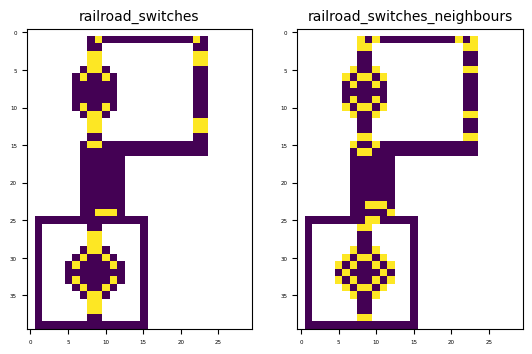

In [31]:
railroad_switch_analyser.do_debug_plot()

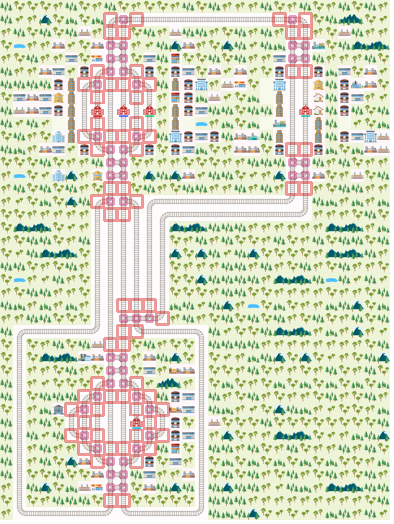

In [32]:
railroad_switch_analyser.prepare_observation_data_plot()
render_env(env=flatland_environment_helper.get_rail_env())

#### RailroadSwitchCluster

railroad_switch_cluster_grid
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
connecting_edge_cluster_grid
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0. 35.  0. ...  0.  0.  0.]
 [ 0. 35.  0. ...  0.  0.  0.]
 [ 0. 35. 35. ...  0.  0.  0.]]
railroad_switch_clusters
{1.0: [(1, 9)], 2.0: [(1, 22)], 3.0: [(3, 8), (3, 9), (4, 8), (4, 9), (5, 8), (5, 9)], 4.0: [(3, 22), (3, 23), (4, 22), (4, 23)], 5.0: [(6, 7)], 6.0: [(6, 10)], 7.0: [(10, 7)], 8.0: [(10, 10)], 9.0: [(11, 8), (11, 9), (12, 8), (12, 9), (13, 8), (13, 9)], 11.0: [(12, 22), (12, 23), (13, 22), (13, 23)], 12.0: [(15, 8)], 13.0: [(15, 9)], 14.0: [(24, 9), (24, 10), (24, 11)], 15.0: [(27, 8), (27, 9), (28, 8), (28, 9), (29, 8), (29, 9)], 16.0: [(30, 7)], 17.0: [(30, 10)], 18.0: [(31, 6)], 19.0: [(31, 11)], 20.0: [(33, 6)], 21.0: [(33, 11)], 22.0: [(34, 7)], 23.0: [(34,

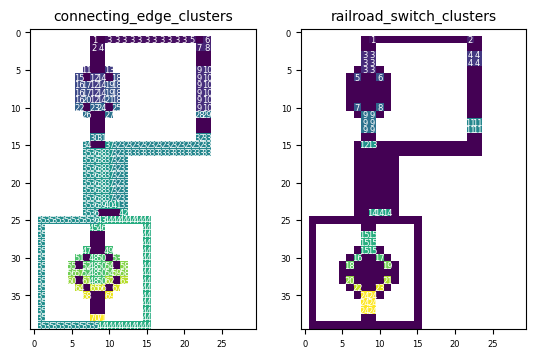

In [33]:
railroad_switch_cluster.do_debug_plot()

#### FlatlandGraphBuilder

##### Show shortest paths - calcuated with the networkx graph and default methods

Show shortest paths for agent 0


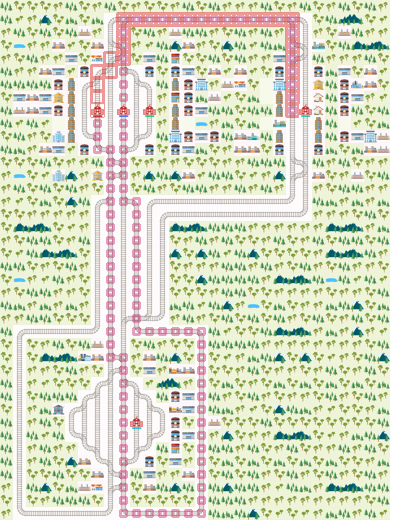

Show shortest paths for agent 1


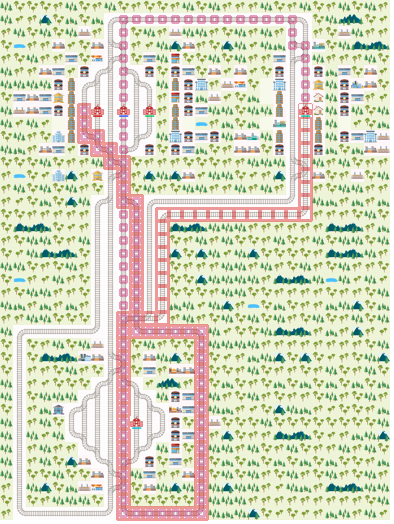

Show shortest paths for agent 2


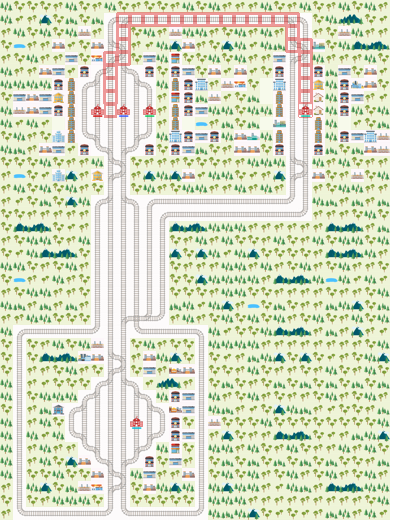

Show shortest paths for agent 3


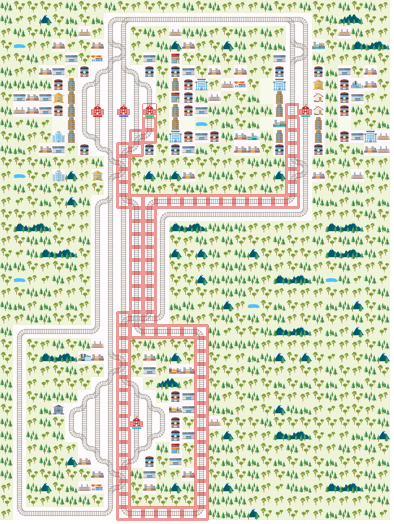

Show shortest paths for agent 4


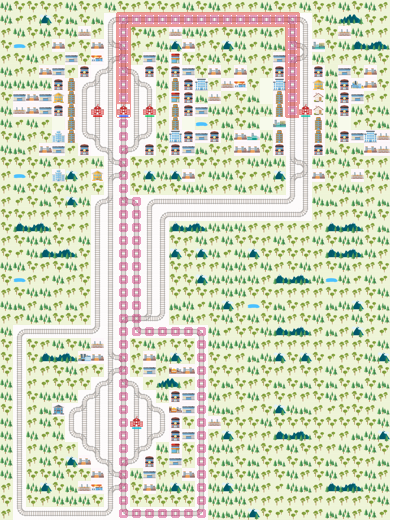

Show shortest paths for agent 5


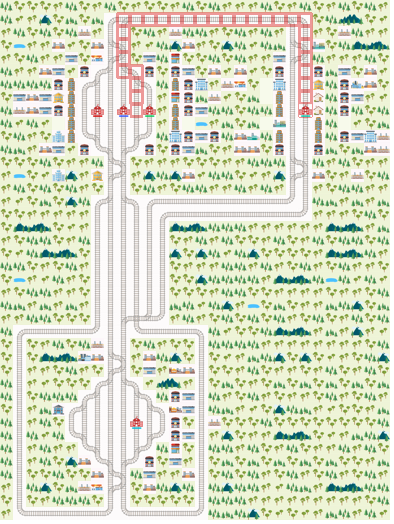

Show shortest paths for agent 6


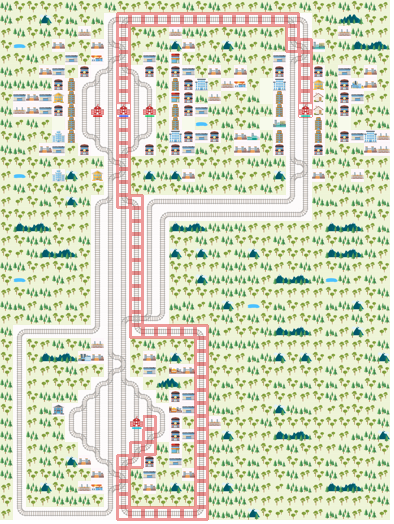

Show shortest paths for agent 7


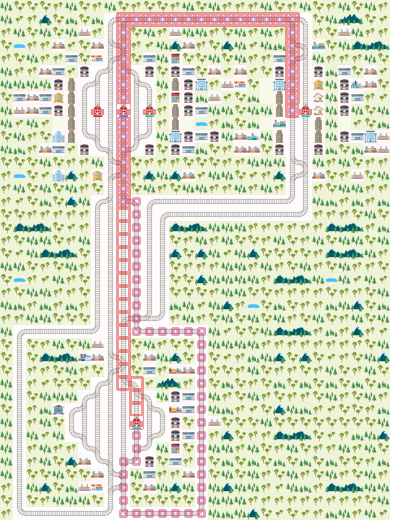

Show shortest paths for agent 8


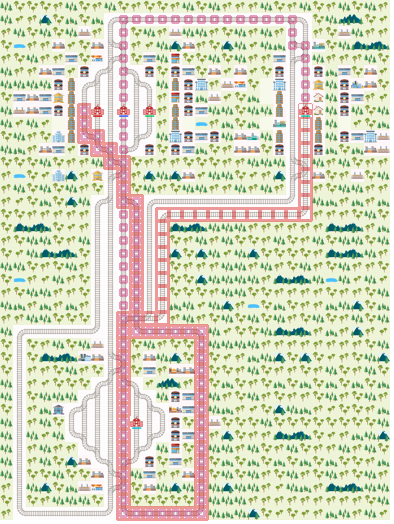

Show shortest paths for agent 9


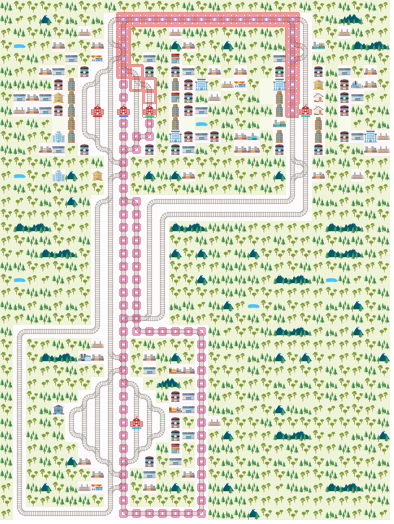

In [34]:
for agent_handle in flatland_environment_helper.get_rail_env().get_agent_handles():
    print('Show shortest paths for agent {}'.format(agent_handle))
    agent_pos, agent_dir, agent_state, agent_target, agent_is_off_map = \
        flatland_environment_helper.get_agent_position_and_direction(handle=agent_handle)
    flatland_graph_builder.prepare_observation_data_plot(agent_pos, agent_dir, agent_target)

    render_env(env=flatland_environment_helper.get_rail_env())

##### Show networkx graph

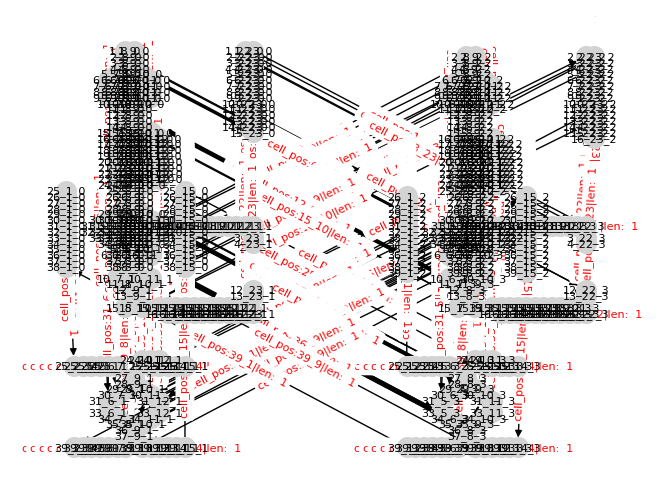

In [35]:
flatland_graph_builder.render()

### Graph operations

In [36]:
agent_handle = 0
agent_pos, agent_dir, agent_state, agent_target, agent_is_off_map = \
    flatland_environment_helper.get_agent_position_and_direction(handle=agent_handle)

path, paths, paths_len = flatland_graph_builder.get_shortest_path(start_position = agent_pos,
                                                              start_direction = agent_dir,
                                                              target_position= agent_target)

In [37]:
print(flatland_graph_builder.get_graph())
print(flatland_graph_builder.get_graph().nodes())
print(flatland_graph_builder.get_graph().edges())

DiGraph with 624 nodes and 674 edges
['1_8_0', '1_9_1', '1_8_3', '2_8_2', '1_9_0', '1_10_1', '1_9_3', '2_9_2', '1_11_1', '1_10_3', '1_12_1', '1_11_3', '1_13_1', '1_12_3', '1_14_1', '1_13_3', '1_15_1', '1_14_3', '1_16_1', '1_15_3', '1_17_1', '1_16_3', '1_18_1', '1_17_3', '1_19_1', '1_18_3', '1_20_1', '1_19_3', '1_21_1', '1_20_3', '1_22_1', '1_21_3', '1_22_0', '1_23_1', '2_22_2', '1_22_3', '1_23_0', '2_23_2', '2_8_0', '3_8_2', '2_9_0', '3_9_2', '2_22_0', '3_22_2', '2_23_0', '3_23_2', '3_8_0', '3_9_1', '4_8_2', '3_8_3', '3_9_0', '4_9_2', '3_22_0', '3_23_1', '4_22_2', '3_22_3', '3_23_0', '4_23_2', '4_8_0', '4_9_1', '5_8_2', '4_8_3', '4_9_0', '5_9_2', '4_22_0', '4_23_1', '5_22_2', '4_22_3', '4_23_0', '5_23_2', '5_7_0', '5_8_1', '5_7_3', '6_7_2', '5_8_0', '6_8_2', '5_9_0', '5_10_1', '6_9_2', '5_9_3', '5_10_0', '6_10_2', '5_22_0', '6_22_2', '5_23_0', '6_23_2', '6_6_0', '6_7_1', '6_6_3', '7_6_2', '6_7_0', '7_7_2', '6_8_0', '7_8_2', '6_9_0', '7_9_2', '6_10_0', '6_11_1', '7_10_2', '6_10_3', '6_1

### Simplify the graph

In [38]:
flatland_graph_builder.activate_simplified()

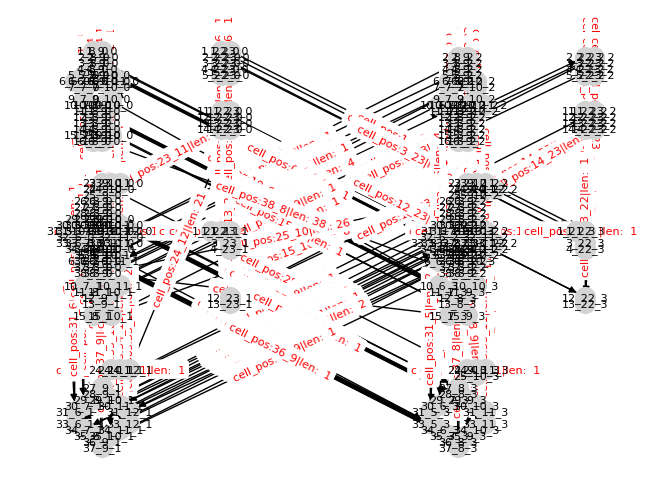

In [39]:
flatland_graph_builder.render()

Show shortest paths for agent 0


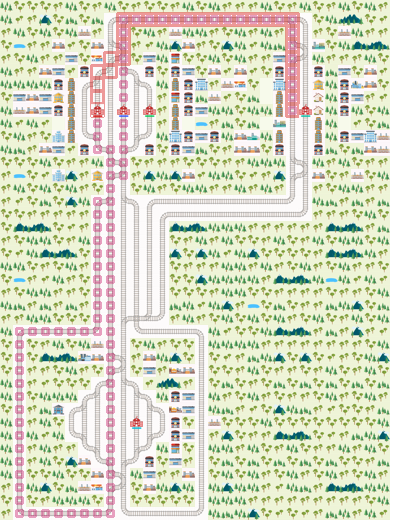

Show shortest paths for agent 1


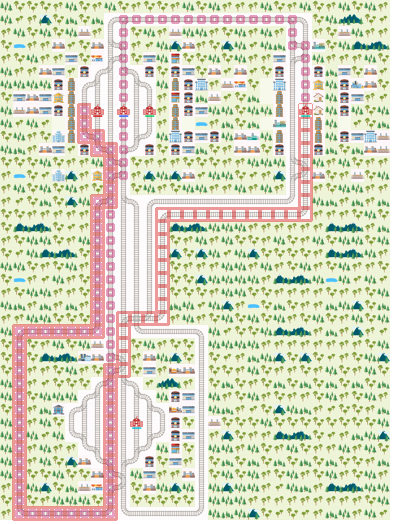

Show shortest paths for agent 2


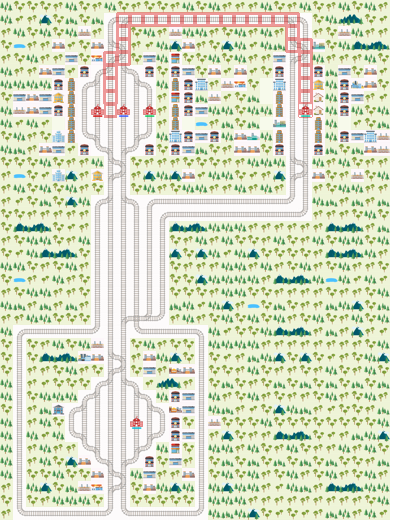

Show shortest paths for agent 3


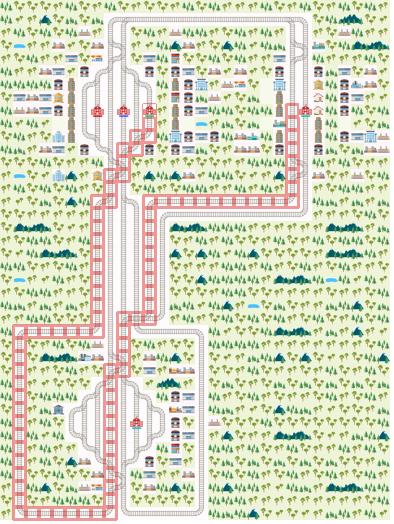

Show shortest paths for agent 4


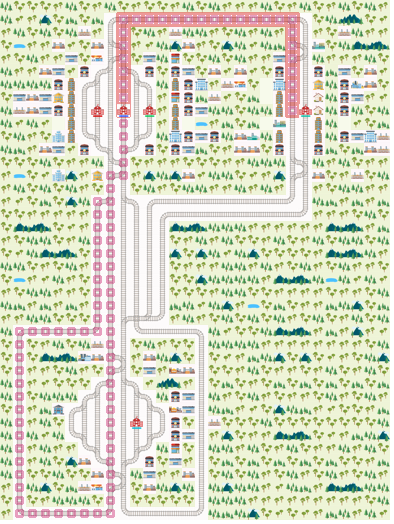

Show shortest paths for agent 5


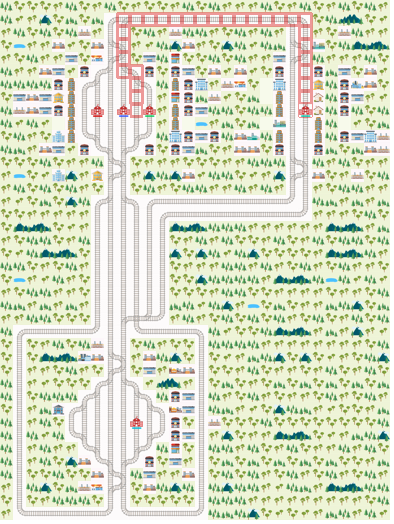

Show shortest paths for agent 6


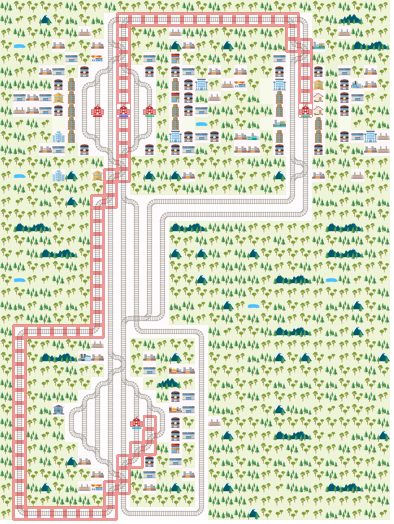

Show shortest paths for agent 7


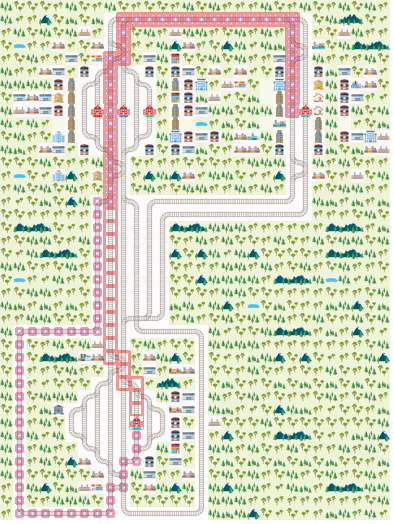

Show shortest paths for agent 8


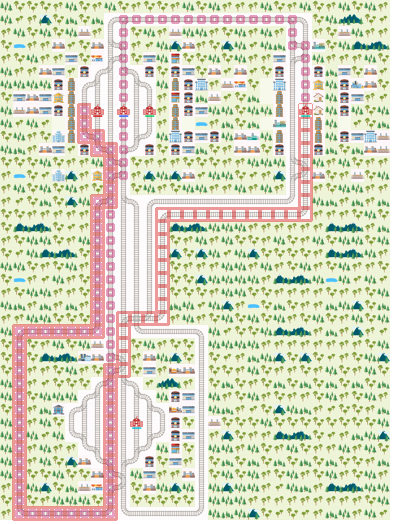

Show shortest paths for agent 9


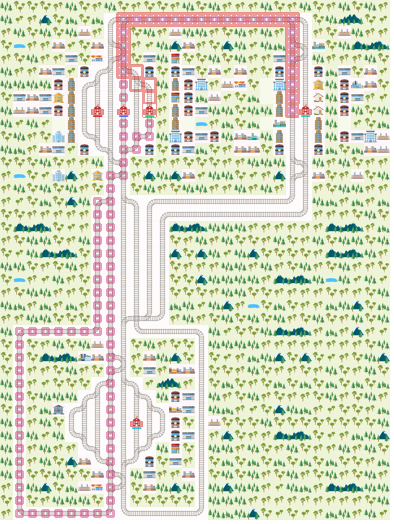

In [40]:
for agent_handle in flatland_environment_helper.get_rail_env().get_agent_handles():
    print('Show shortest paths for agent {}'.format(agent_handle))
    agent_pos, agent_dir, agent_state, agent_target, agent_is_off_map = \
        flatland_environment_helper.get_agent_position_and_direction(handle=agent_handle)
    flatland_graph_builder.prepare_observation_data_plot(agent_pos, agent_dir, agent_target)

    render_env(env=flatland_environment_helper.get_rail_env())

Author: Adrian Egli